In [1]:
#import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Import Data
path = r'C:\Users\msyeu\Instacart Basket Analysis'

In [4]:
ords_prods_merge_grouped = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_merge_grouped.pkl'))

<Axes: xlabel='order_dow'>

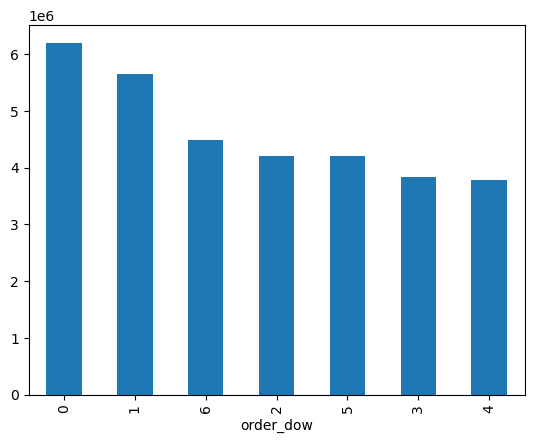

In [5]:
ords_prods_merge_grouped['order_dow'].value_counts().plot.bar()

<Axes: xlabel='order_dow'>

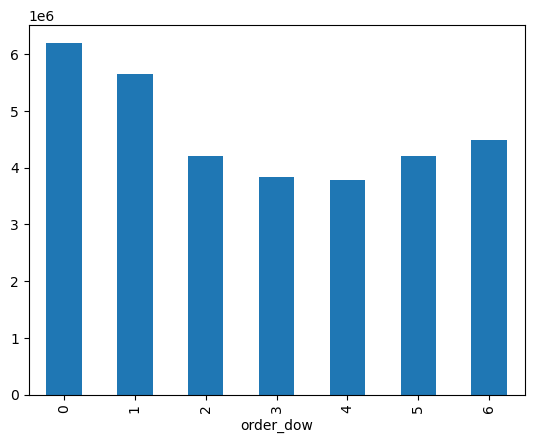

In [6]:
ords_prods_merge_grouped['order_dow'].value_counts().sort_index().plot.bar()

<Axes: xlabel='order_dow'>

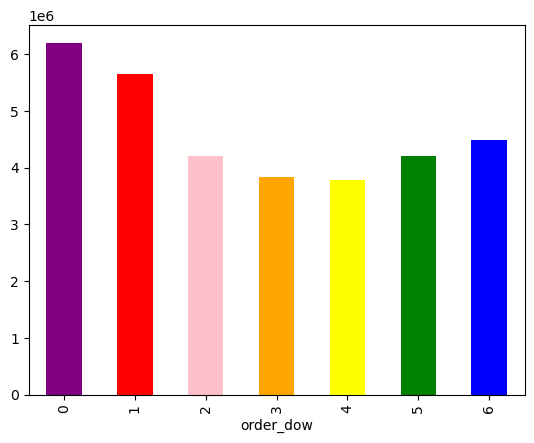

In [7]:
ords_prods_merge_grouped['order_dow'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

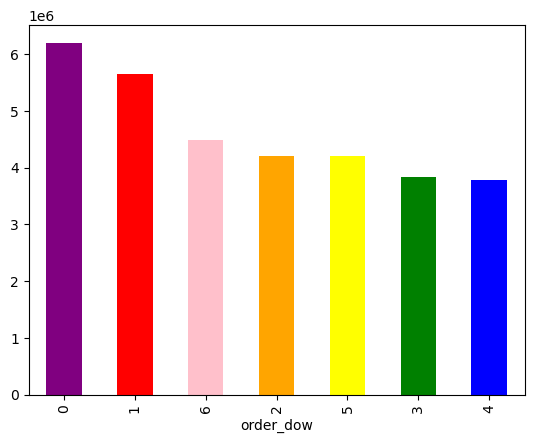

In [8]:
bar = ords_prods_merge_grouped['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_order_dow.png'))

<Axes: ylabel='Frequency'>

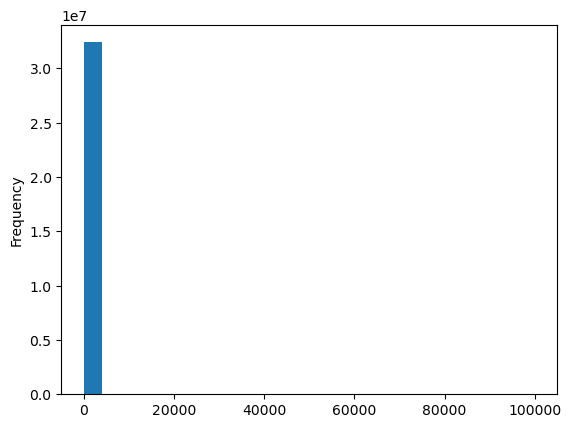

In [11]:
ords_prods_merge_grouped['prices'].plot.hist(bins = 25)

In [12]:
ords_prods_merge_grouped.loc[ords_prods_merge_grouped['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_habits,spending_flag,ordering_habits,order_freq_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,prior,12,2,...,High-range product,Regularly Busy Days,Regularly Busy Days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,prior,22,6,...,High-range product,Regularly Busy Days,Regularly Busy Days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,prior,2,2,...,High-range product,Regularly Busy Days,Regularly Busy Days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,prior,3,0,...,High-range product,Busiest Days,Busiest Days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,prior,8,1,...,High-range product,Busiest Days,Busiest Days,Average orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,prior,29,0,...,High-range product,Busiest Days,Busiest Days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,prior,31,0,...,High-range product,Busiest Days,Busiest Days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,prior,13,3,...,High-range product,Slowest Days,Slowest Days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,prior,7,3,...,High-range product,Slowest Days,Slowest Days,Average orders,12,Regular customer,1178.381871,High spender,7.0,Frequent customer


In [13]:
ords_prods_merge_grouped.loc[ords_prods_merge_grouped['prices'] > 100, 'prices'] = np.nan

In [15]:
ords_prods_merge_grouped['prices'].max()

25.0

<Axes: ylabel='Frequency'>

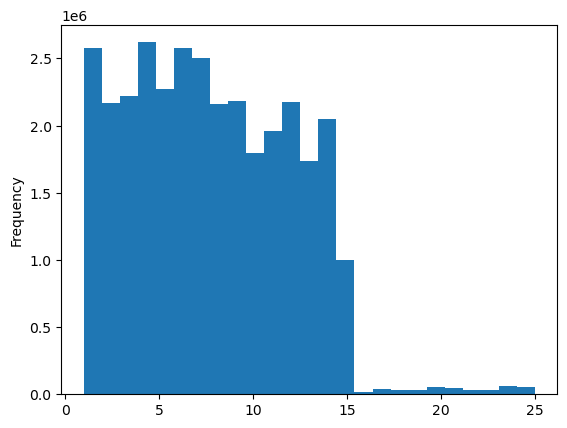

In [16]:
ords_prods_merge_grouped['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

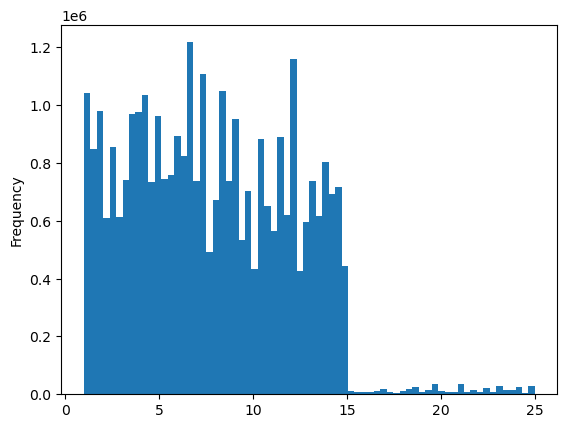

In [17]:
ords_prods_merge_grouped['prices'].plot.hist(bins = 70)

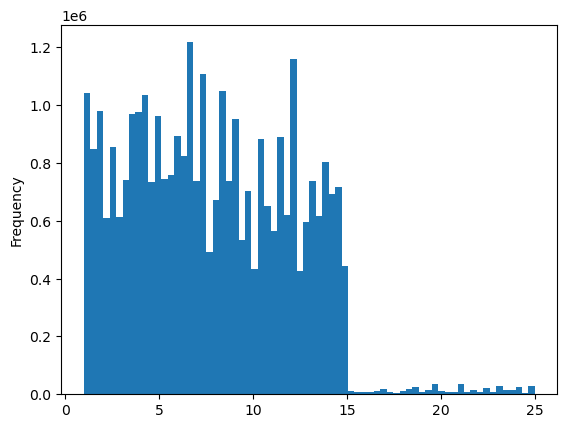

In [19]:
hist = ords_prods_merge_grouped['prices'].plot.hist(bins=70)

In [20]:
hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_order_dow.png'))

In [21]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge_grouped)) <= 0.7

In [22]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
#Store 70% of the sample in the dataframe big
big = ords_prods_merge_grouped[dev]

In [24]:
#Store 30% of the sample in the datagrame small
small = ords_prods_merge_grouped[~dev]

In [26]:
len(ords_prods_merge_grouped)

32404859

In [27]:
len(big) + len(small)

32404859

In [28]:
df_2 = small[['order_dow', 'prices']]

C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


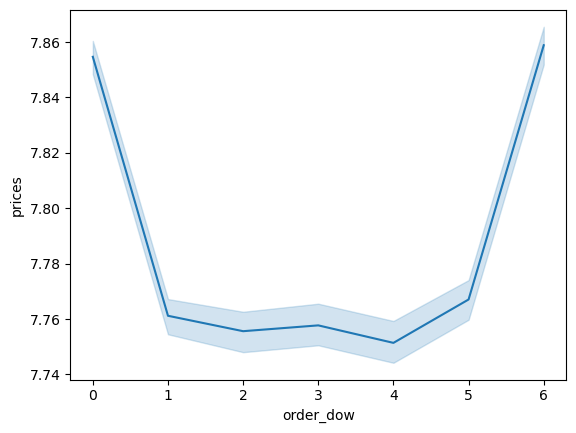

In [30]:
line = sns.lineplot(data = df_2, x= 'order_dow', y= 'prices')

In [31]:
line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_order_dow.png'))